<a href="https://colab.research.google.com/github/arrrpii/Wine-Quality-Machine-Learning/blob/main/ml_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

# 1. Data Collection

In this project, we begin by working with a popular wine quality dataset that includes both red and white wines. The first step of our data analysis involves uploading the raw datasets from external sources to our environment for exploration and analysis. We use the Google Colab environment to upload the datasets, which consists of two separate CSV files for red wine and white wine.

Using the files.upload() method from Google Colab, we upload the two CSV files (winequality-red.csv and winequality-white.csv) containing data about different wine attributes such as alcohol content, acidity, pH levels, and quality ratings. These datasets are then loaded into Pandas DataFrames using pd.read_csv(), specifying a semicolon (;) delimiter.

Next, we enrich the datasets by adding a new column, 'type', to each DataFrame. The 'red' type is assigned to the red wine dataset, and the 'white' type is assigned to the white wine dataset. This helps differentiate between the two wine types in the combined dataset.

After adding the new column, we proceed to concatenate the two DataFrames (red and white wines) vertically using pd.concat(). This allows us to create a unified dataset containing both red and white wine samples, while preserving the attributes of both wine types. The dataset is then reset using .reset_index(drop=True) to ensure that the indices are properly aligned and continuous.

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

red_df['type'] = 'red'
white_df['type'] = 'white'


df = pd.concat([red_df, white_df], axis=0).reset_index(drop=True)
print(f"Combined dataset shape: {df.shape}")
df

Saving winequality-white.csv to winequality-white.csv
Saving winequality-red.csv to winequality-red.csv
Combined dataset shape: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
df.to_csv("wine_raw.csv", index=False, encoding='utf-8-sig')

# 2. Data Preprocessing

In the data preprocessing stage, we focus on preparing the dataset for further analysis and model building. This step involves handling missing values, verifying column types, scaling the features, and transforming the target variable for classification purposes.

1. Checking for Missing Values
The first task in the preprocessing pipeline is to check for any missing or null values within the dataset. Missing values can significantly impact the performance of machine learning models, so it's crucial to identify and handle them before proceeding with any further steps. In our dataset, we perform this check to ensure that the data is complete and ready for scaling and transformation.

2. Verifying Column Data Types
Next, we inspect the data types of the columns in the dataset to ensure that each column is of the correct type. For instance, numeric columns should have numeric data types, while categorical columns (such as 'type' for wine type) should be properly categorized. This step is important to avoid issues during model training, as incorrect data types can lead to errors or misleading results. Our dataset includes both numerical and categorical data types, and we make sure each one is appropriately classified.

3. Feature Scaling
Feature scaling is an essential step in preparing the dataset for machine learning models, especially when the models are sensitive to the scale of the input data. For this, we use the StandardScaler from the sklearn.preprocessing module, which standardizes the features by removing the mean and scaling to unit variance. This ensures that the features are on a comparable scale and helps improve the performance and convergence speed of machine learning models, especially those sensitive to scale like logistic regression or neural networks.

4. Transforming the Target Variable
In this project, we aim to perform a binary classification task, where the goal is to predict whether a wine is "Good" or "Bad" based on its features. For this, we redefine the target variable quality into a new binary variable quality_label. If the wine quality is greater than or equal to 6, it is classified as "Good" (label 1), and if it is less than 6, it is classified as "Bad" (label 0). This transformation helps in simplifying the classification problem and allows us to apply binary classifiers.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [ ]:
df['type'] = df['type'].map({'red': 0, 'white': 1})  # Encode red as 0 and white as 1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
features = df_scaled.drop('quality', axis=1)
df_scaled[features.columns] = scaler.fit_transform(features)


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
#Good (1) if quality >= 6, else Bad (0)
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


# 3. Data Analysis

1. Correlation Matrix
We start by analyzing the correlations between numerical features. The correlation matrix shows how strongly each feature is related to the others. For example, we may observe strong positive or negative correlations between certain features, such as alcohol content and quality. We use a heatmap to visualize these relationships, with color intensity representing the strength of the correlation.

2. Wine Quality Distribution by Type
Next, we plot the distribution of wine quality scores for both red and white wines. This helps to visually compare the frequencies of different quality scores across wine types, providing a sense of how quality is distributed in the dataset. The countplot with hues representing wine type allows us to see how the two types of wine differ in quality distribution.

3. Pairwise Plot of Key Features
A pairplot is used to visualize the pairwise relationships between key features such as residual sugar, density, alcohol content, and wine type. This plot helps identify any potential patterns or clusters in the data that could indicate how these features interact with each other and potentially influence wine quality.

4. Wine Type Distribution
We also visualize the distribution of wine types (red and white). This countplot shows how many red and white wines are present in the dataset, providing insight into the balance between the two wine types.

5. Alcohol Content Across Wine Quality
A boxplot of alcohol content across different wine quality scores helps us understand the distribution of alcohol content in relation to quality. This plot is useful to see if there is any trend or variation in alcohol content based on the quality of the wine, helping to identify key factors that influence wine quality.

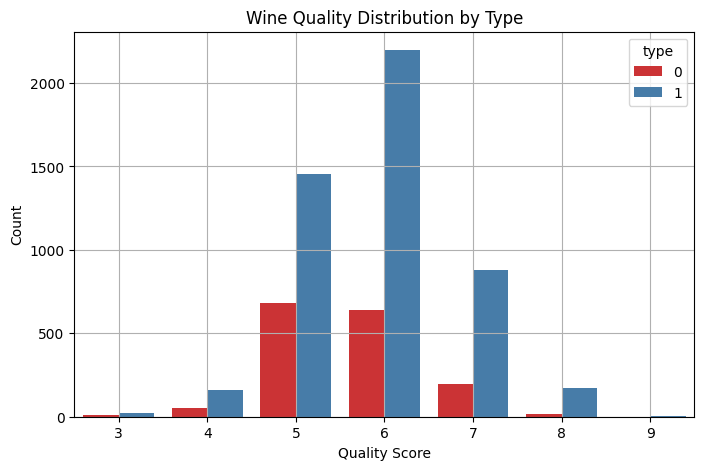

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality', hue='type', palette='Set1')
plt.title('Wine Quality Distribution by Type')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

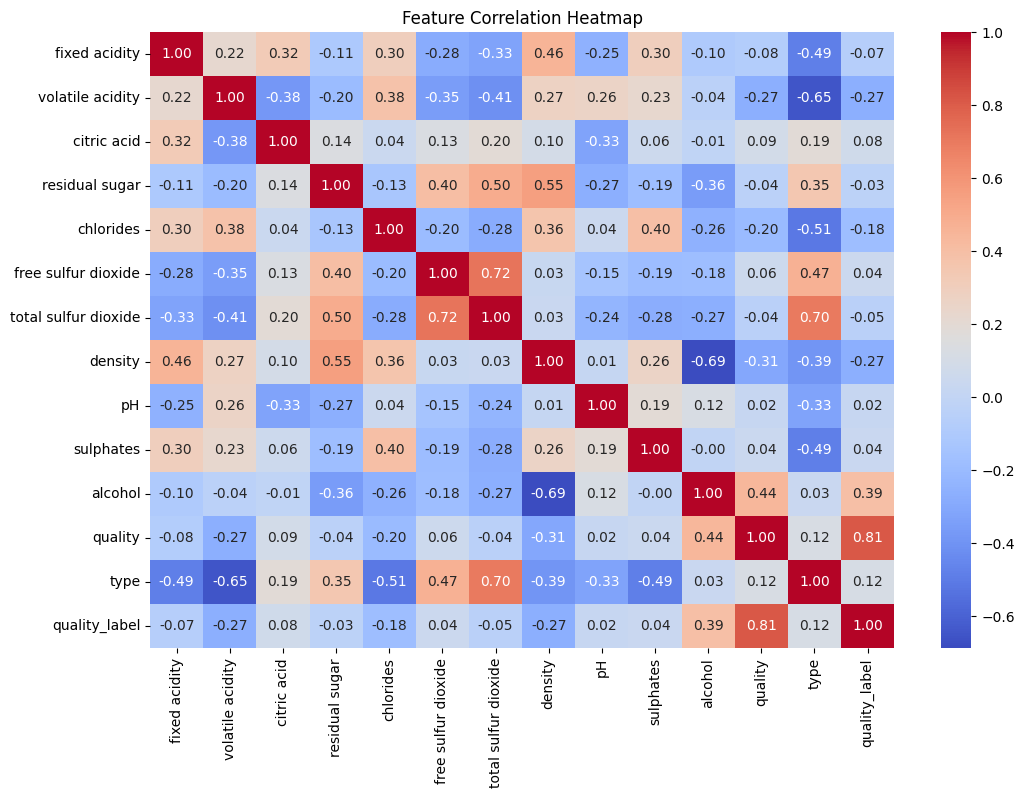

In [ ]:
# Correlation matrix on numeric features only
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()



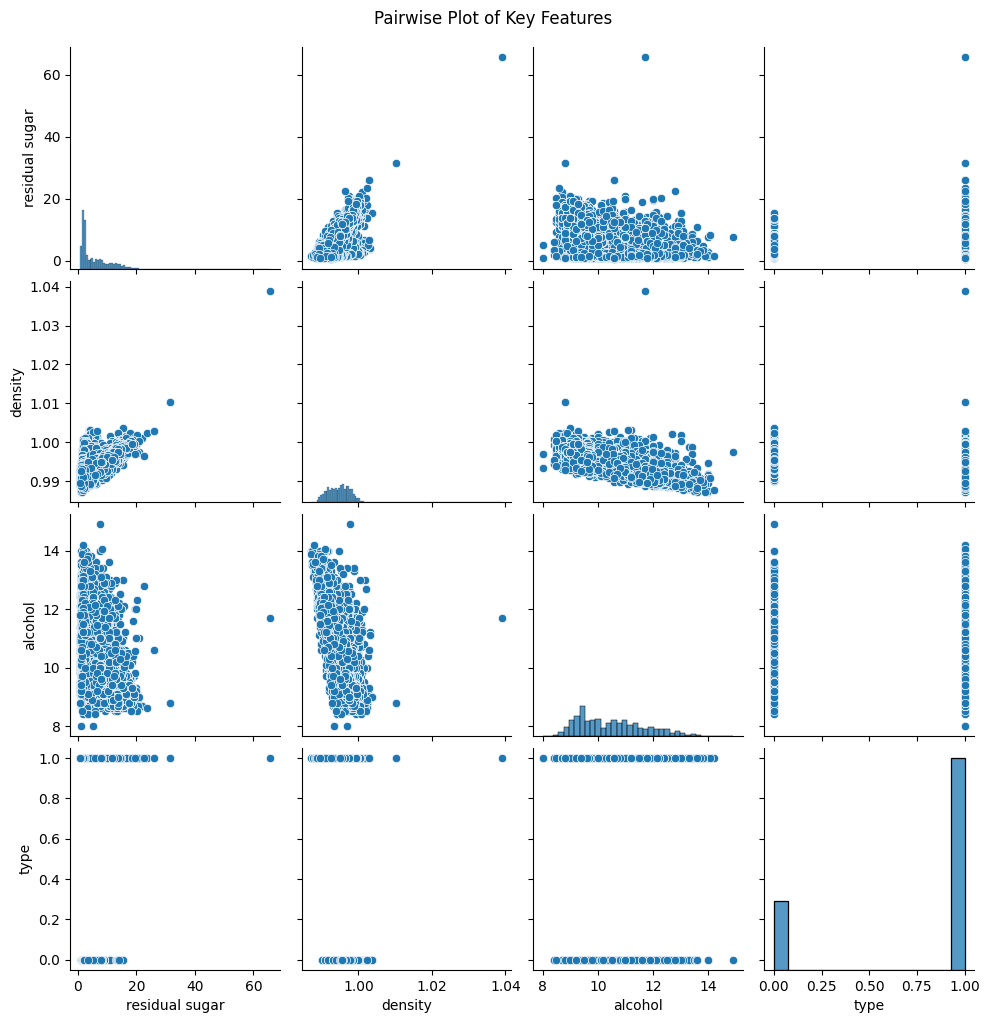

In [ ]:
sns.pairplot(df[['residual sugar', 'density', 'alcohol', 'type']])
plt.suptitle("Pairwise Plot of Key Features", y=1.02)
plt.show()

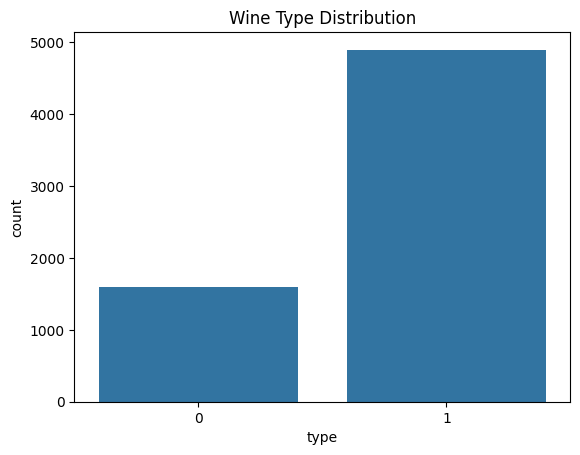

In [ ]:
sns.countplot(x=df['type'])
plt.title('Wine Type Distribution')
plt.show()

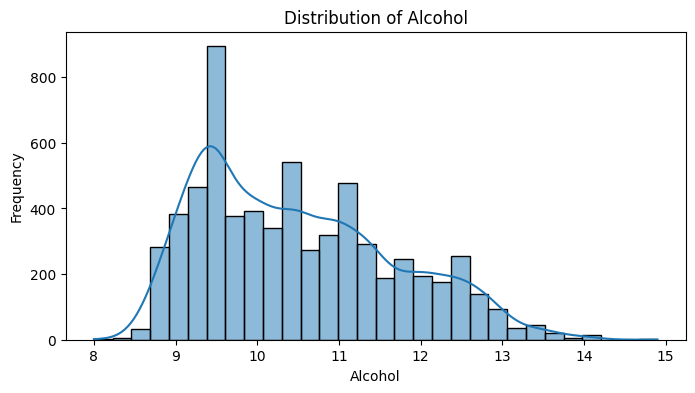

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['alcohol'], bins=30, kde=True)
plt.title("Distribution of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

<ipython-input-18-6e975851791b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='quality', y='alcohol', palette='viridis')


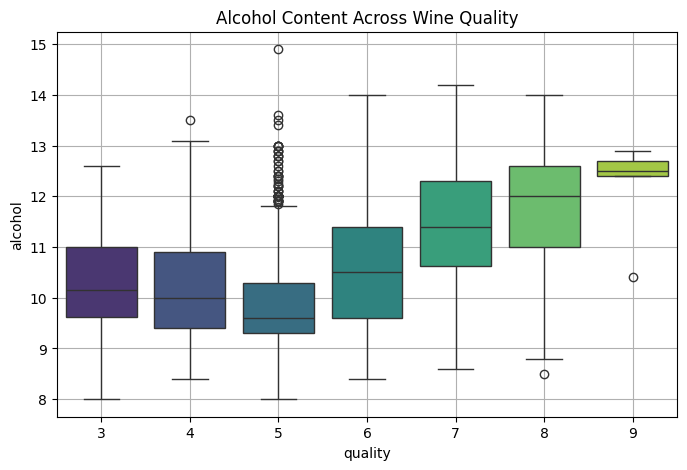

In [ ]:
# Alcohol vs Quality
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='quality', y='alcohol', palette='viridis')
plt.title('Alcohol Content Across Wine Quality')
plt.grid(True)
plt.show()


In [ ]:
df.to_csv("wine_prep.csv", index=False, encoding='utf-8-sig')

# 4. Ml Model Training

In this step, we trained and evaluated multiple machine learning models to classify wine quality as either Good (1) or Bad (0) based on physicochemical properties.

1. Data Splitting

  The dataset was split into training and testing sets using train_test_split with stratification to ensure balanced distribution of the target class.

2. Model Selection

  Since our task is supervised binary classification, we selected the following models:

    1. Logistic Regression

    2. K-Nearest Neighbors (KNN)

    3. Naive Bayes

    4. Random Forest

    5. Neural Network (MLPClassifier)

In [ ]:
X = df.drop(['quality', 'quality_label', 'type'], axis=1)  # We drop target and categorical columns
y = df['quality_label']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


3.Training & Evaluation

Each model was trained on the training set and evaluated on the testing set.

We used key metrics for classification:

  1. Accuracy

  2. Precision

  3. Recall

  4. F1-Score

  5. Confusion Matrix

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.7376923076923076
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.61       477
           1       0.77      0.84      0.80       823

    accuracy                           0.74      1300
   macro avg       0.72      0.70      0.71      1300
weighted avg       0.73      0.74      0.73      1300



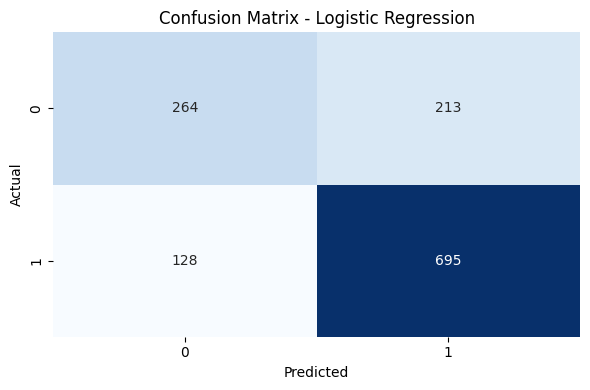

In [ ]:
#First of all, we try logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracies = {}
accuracy = accuracy_score(y_test, y_pred)
accuracies["Logistic Regression"] = accuracy

print("Logistic Regression")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Random Forest
Accuracy: 0.8423076923076923

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.86      0.14      0.24        43
           5       0.90      1.00      0.95       402
           6       0.83      0.95      0.88       597
           7       0.73      0.51      0.60       215
           8       0.86      0.33      0.48        36
           9       0.00      0.00      0.00         1

    accuracy                           0.84      1300
   macro avg       0.60      0.42      0.45      1300
weighted avg       0.83      0.84      0.82      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


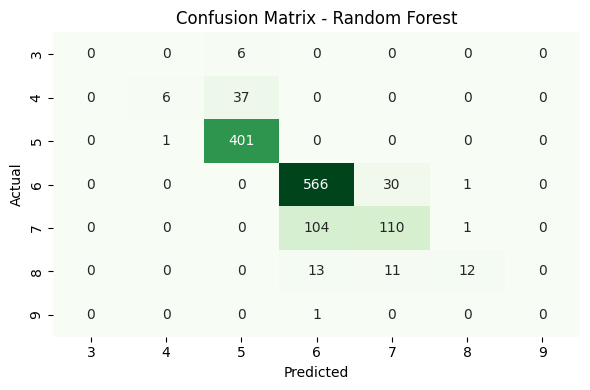

Mean CV Accuracy: 0.7711255995736365


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
accuracies["Random Forest Classifier Mult"] = accuracy

print("Random Forest")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print("Mean CV Accuracy:", cv_scores.mean())


Random Forest
Accuracy: 0.8253846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       451
           1       0.87      0.86      0.87       849

    accuracy                           0.83      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.83      0.83      0.83      1300



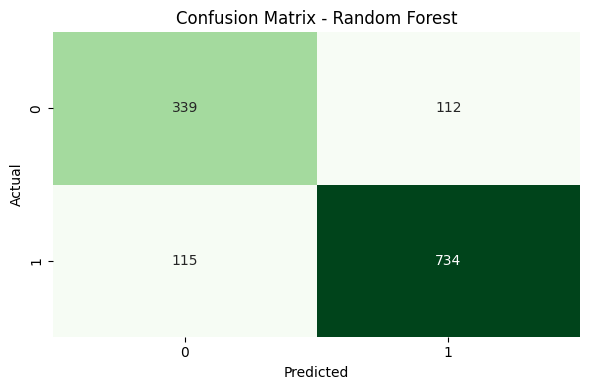

Mean CV Accuracy: 0.6632644045715639


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.drop(['quality', 'quality_label', 'type'], axis=1)
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracies["Random Forest"] = accuracy

print("Random Forest")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print("Mean CV Accuracy:", cv_scores.mean())


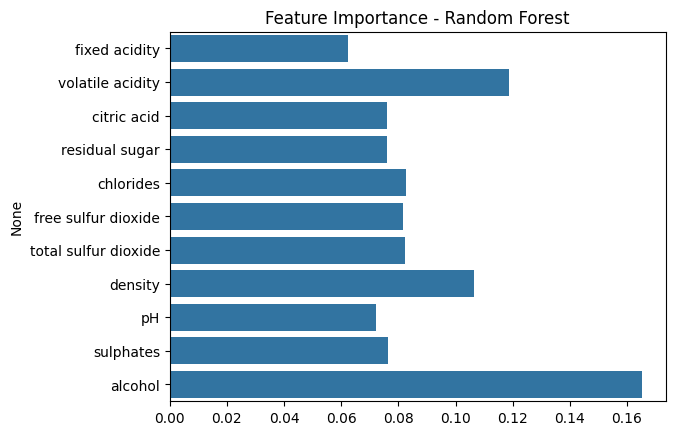

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_clf.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()


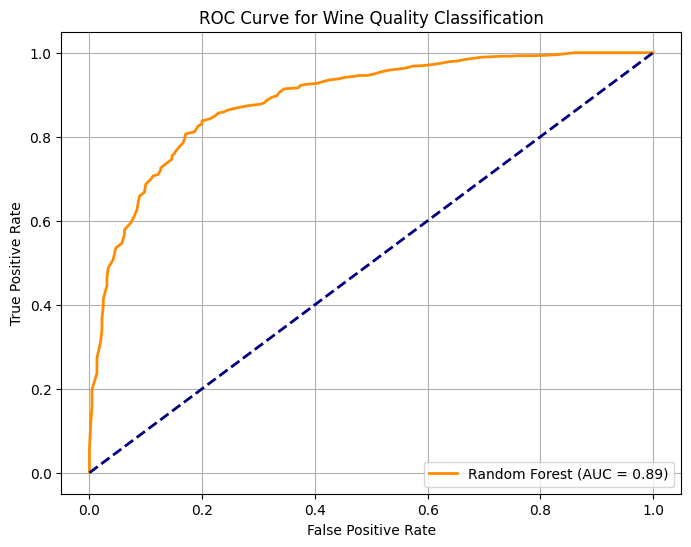

In [ ]:
from sklearn import metrics

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# We predict probabilities
y_probs = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Wine Quality Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
accuracies["KNN"] = accuracy

print("KNN Accuracy:", accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.6738461538461539
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.51      0.52       451
           1       0.74      0.76      0.75       849

    accuracy                           0.67      1300
   macro avg       0.64      0.63      0.64      1300
weighted avg       0.67      0.67      0.67      1300

KNN Confusion Matrix:
 [[229 222]
 [202 647]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes model
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nb)
accuracies["Naive Bayes"] = accuracy

print("Naive Bayes Accuracy:", accuracy)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.6915384615384615
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.61      0.58       451
           1       0.78      0.73      0.76       849

    accuracy                           0.69      1300
   macro avg       0.67      0.67      0.67      1300
weighted avg       0.70      0.69      0.69      1300

Naive Bayes Confusion Matrix:
 [[275 176]
 [225 624]]


In [ ]:
from sklearn.neural_network import MLPClassifier

# We instantiate the Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_mlp)
accuracies["Neural Network"] = accuracy

print("Neural Network Accuracy:", accuracy)
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Neural Network Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


Neural Network Accuracy: 0.7453846153846154
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.58      0.61       451
           1       0.79      0.83      0.81       849

    accuracy                           0.75      1300
   macro avg       0.72      0.71      0.71      1300
weighted avg       0.74      0.75      0.74      1300

Neural Network Confusion Matrix:
 [[263 188]
 [143 706]]


# 5. Best ML Model Selection

As we got from the Ml Model Trainig results, the best ML Model that performance was by Random Forest. Howevery, we will enhancef its work and try to visualise.

Hyperparameter Tuning:
Random Forest can be fine-tuned for better performance by optimizing its hyperparameters. We will use GridSearchCV to find the best combination.

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score: 0.8270135855482342
Improved Accuracy: 0.8238461538461539
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       451
           1       0.86      0.87      0.87       849

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300



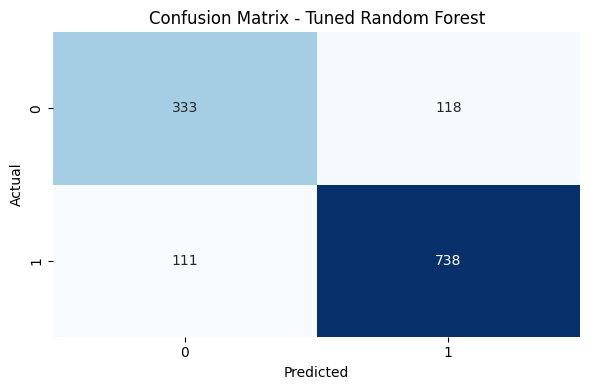

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Model Evaluation on Test Set:
After tuning, we ensure evaluating our model on a hold-out test set that was not used during training. This ensures the model’s ability to generalize to unseen data.

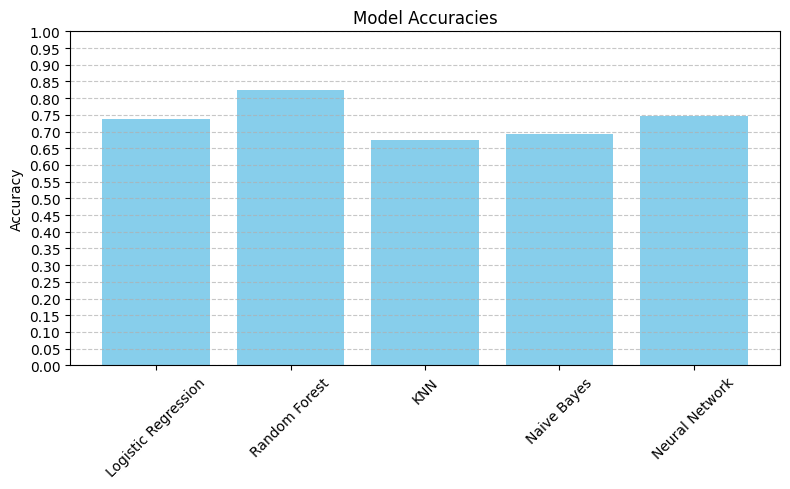

In [ ]:
import numpy as np

plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Bernoulli Naive Bayes model
nb = BernoulliNB()

nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nb)
accuracies["Naive Bayes"] = accuracy

print("Bernoulli Naive Bayes Accuracy:", accuracy)
print("Bernoulli Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Bernoulli Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Bernoulli Naive Bayes Accuracy: 0.6576923076923077
Bernoulli Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.05      0.09       451
           1       0.66      0.98      0.79       849

    accuracy                           0.66      1300
   macro avg       0.62      0.51      0.44      1300
weighted avg       0.63      0.66      0.55      1300

Bernoulli Naive Bayes Confusion Matrix:
 [[ 22 429]
 [ 16 833]]
